<a href="https://colab.research.google.com/github/tusharkanta/ML_DL/blob/eva/S12/S12_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from google.colab import files
src = list(files.upload().values())[0]
open('dataloader_s12_10.py','wb').write(src)
import dataloader_s12_10 as dl
#src = list(files.upload().values())[0]
#open('plotimagefinal.py','wb').write(src)
import plotimagefinal as pimage
#src = list(files.upload().values())[0]
#open('model_def_resnet.py','wb').write(src)
#import model_def_resnet as modeldef
import torch
#src = list(files.upload().values())[0]
#open('lr_finder_s12.py','wb').write(src)
from lr_finder_s12 import LRFinder
#src = list(files.upload().values())[0]
#open('model_training_s12.py','wb').write(src)
import model_training_s12 as modeltrt
#src = list(files.upload().values())[0]
#open('utils.py','wb').write(src)
import utils as utils
#src = list(files.upload().values())[0]
#open('train_model.py','wb').write(src)
#import train_model as train_model
import utils as utils
import torch.nn as nn
import os
import torchvision.models as models
import torch.optim as optim
import torchvision.datasets as datasets

Saving dataloader_s12_10.py to dataloader_s12_10.py


  pip install torch-lr-finder -v --global-option="amp"


In [64]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-8xeu5yyu
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-8xeu5yyu
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=0eeaa13ebfe2063cc295303ca29eb52ae6525e623bafe8e37067ece1c457261a
  Stored in directory: /tmp/pip-ephem-wheel-cache-kf7ji973/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [3]:
train_dl, test_dl, train_ds, test_ds=dl.load_data()

downloading http://cs231n.stanford.edu/tiny-imagenet-200.zip
test_set dir len is : 286
train_set dir len is : 506


In [4]:
print('####Train Dataset is : \n\t\n{}'.format(train_ds))
print('####Validation Dataset is : \n\t\n{}'.format(test_ds))
#print('####Train and Validation Dataset is : \n\t\n{}'.format(tv_ds))

####Train Dataset is : 
	
Dataset ImageFolder
    Number of datapoints: 100195
    Root location: train_set
    StandardTransform
Transform: <dataloader_s12_10.album_compose_train object at 0x7f1b0acce588>
####Validation Dataset is : 
	
Dataset ImageFolder
    Number of datapoints: 56195
    Root location: test_set
    StandardTransform
Transform: <dataloader_s12_10.album_compose_test object at 0x7f1b6ee28748>


In [0]:
from matplotlib import pyplot as plt
def show_imgs(img,label):
    print('Image label is : {}'.format(train_ds.classes[label]))
    plt.imshow(img.permute(1, 2, 0))

Image label is : n01443537


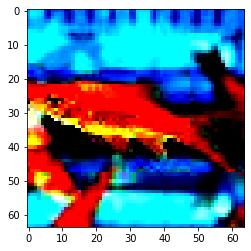

In [56]:
show_imgs(*test_ds[20])

In [0]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [0]:
def show_batch(dl,numOfImagesToDisplay=10,imgsPerRow=5):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(26, 26))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:numOfImagesToDisplay], imgsPerRow).permute(1, 2, 0))
        break

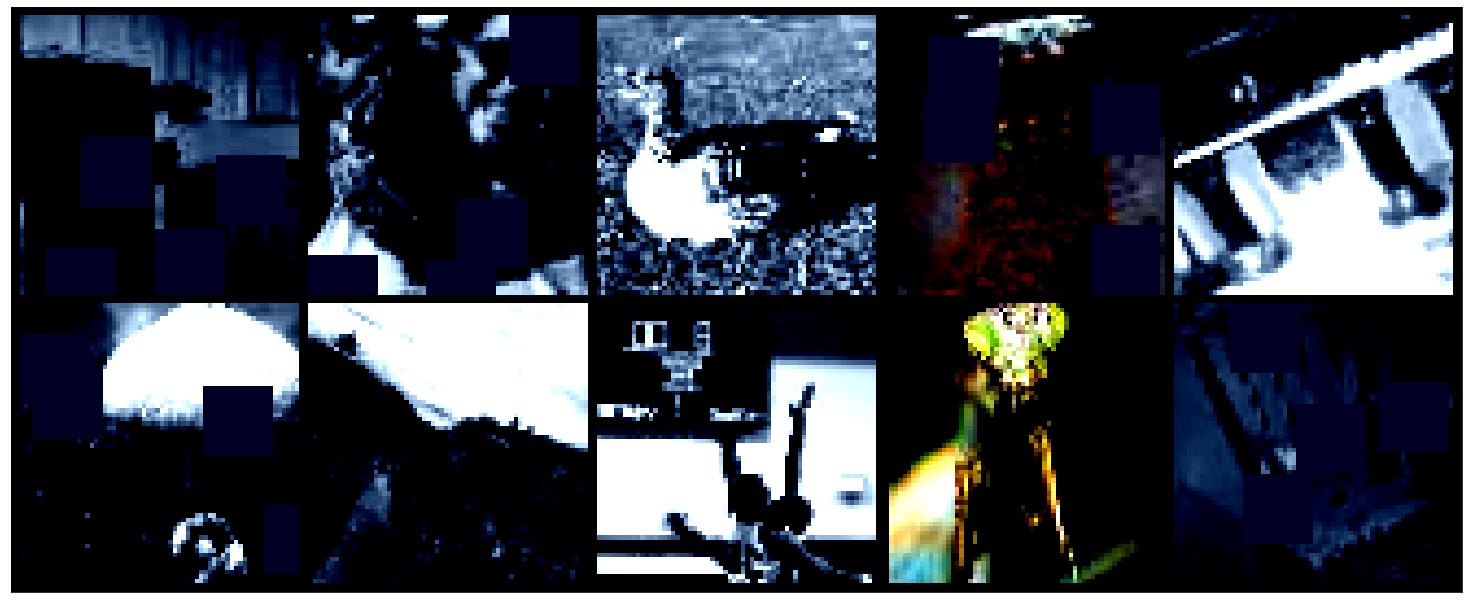

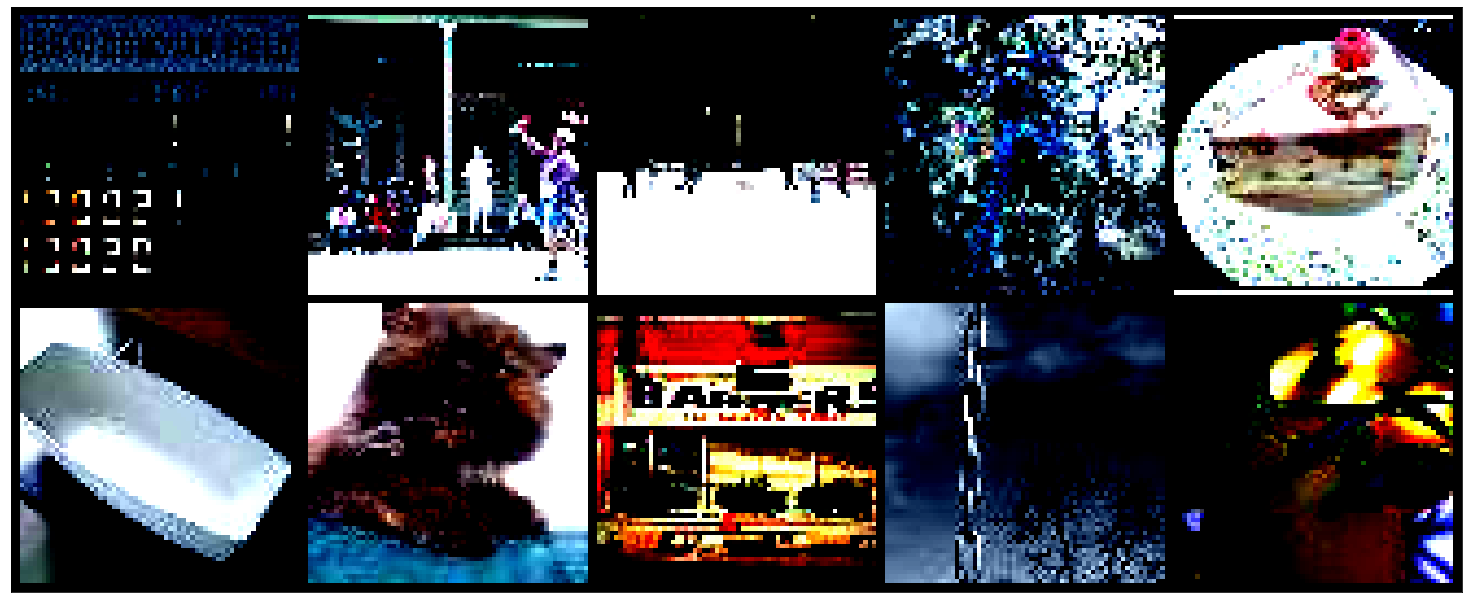

In [59]:
show_batch(train_dl)
show_batch(test_dl)

In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = modeldef.ResNet18().to(device)
model=models.resnet18()
model.avgpool=nn.AdaptiveAvgPool2d(1)
num_ftrs = model.fc.in_features
model.fc=nn.Linear(num_ftrs,200)
model=model.to(device)
summary(model, input_size=(3, 64, 64))
#print(model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
       BasicBlock-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1

In [6]:
for images, labels in train_dl:
    images, labels = images.cuda(), labels.cuda()
    print('images.shape:', images.shape)
    #print('Length of images : {}'.format(len(images)))
    #print('Length of Labels : {}'.format(len(labels)))
    out = model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([256, 3, 64, 64])
out.shape: torch.Size([256, 200])


In [0]:
import torch.optim as optim
#model =  modeldef.net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)
#scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1.5, steps_per_epoch=int(len(train_dl))+1, epochs=50,  pct_start=0.2, div_factor=10, final_div_factor=100 )
scheduler =torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.135, total_steps=50,anneal_strategy='linear' ,base_momentum=0.85, max_momentum=0.95,steps_per_epoch=None,epochs=None,div_factor=10.0, pct_start=0.2, final_div_factor=100.0)
#print("start LR ",scheduler.get_lr())
#print("Total no of steps:", scheduler.total_steps)
#print("No. of steps to increase LR -", scheduler.step_size_up)
#print("No. of steps to reduce LR - ", scheduler.step_size_down)

EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    print(f"Learning Rate = {scheduler.get_last_lr()[0]:0.6f}")
    modeltrt.train(model, device, train_dl, optimizer, epoch)
    modeltrt.test(model, device, test_dl)
    scheduler.step()

  0%|          | 0/392 [00:00<?, ?it/s]

EPOCH: 0
Learning Rate = 0.013500


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 4.6836, Accuracy: 3514/56195 (6.25%)

EPOCH: 1
Learning Rate = 0.027000


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 4.1686, Accuracy: 6489/56195 (11.55%)

EPOCH: 2
Learning Rate = 0.040500


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 3.9657, Accuracy: 8067/56195 (14.36%)

EPOCH: 3
Learning Rate = 0.054000


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 3.8859, Accuracy: 9099/56195 (16.19%)

EPOCH: 4
Learning Rate = 0.067500


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 3.4132, Accuracy: 12798/56195 (22.77%)

EPOCH: 5
Learning Rate = 0.081000


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 3.3251, Accuracy: 13683/56195 (24.35%)

EPOCH: 6
Learning Rate = 0.094500


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 3.3249, Accuracy: 13772/56195 (24.51%)

EPOCH: 7
Learning Rate = 0.108000


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 3.1902, Accuracy: 14864/56195 (26.45%)

EPOCH: 8
Learning Rate = 0.121500


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 3.0772, Accuracy: 16314/56195 (29.03%)

EPOCH: 9
Learning Rate = 0.135000


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.8241, Accuracy: 18694/56195 (33.27%)

EPOCH: 10
Learning Rate = 0.131628


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.7354, Accuracy: 19847/56195 (35.32%)

EPOCH: 11
Learning Rate = 0.128257


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.5984, Accuracy: 21239/56195 (37.80%)

EPOCH: 12
Learning Rate = 0.124885


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.4837, Accuracy: 22433/56195 (39.92%)

EPOCH: 13
Learning Rate = 0.121514


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.4686, Accuracy: 22803/56195 (40.58%)

EPOCH: 14
Learning Rate = 0.118142


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.3709, Accuracy: 23872/56195 (42.48%)

EPOCH: 15
Learning Rate = 0.114770


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.3312, Accuracy: 24367/56195 (43.36%)

EPOCH: 16
Learning Rate = 0.111399


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.2465, Accuracy: 25239/56195 (44.91%)

EPOCH: 17
Learning Rate = 0.108027


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.2239, Accuracy: 25585/56195 (45.53%)

EPOCH: 18
Learning Rate = 0.104655


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.0272, Accuracy: 27812/56195 (49.49%)

EPOCH: 19
Learning Rate = 0.101284


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.0754, Accuracy: 27468/56195 (48.88%)

EPOCH: 20
Learning Rate = 0.097912


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 2.0732, Accuracy: 27343/56195 (48.66%)

EPOCH: 21
Learning Rate = 0.094540


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.8857, Accuracy: 29749/56195 (52.94%)

EPOCH: 22
Learning Rate = 0.091169


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.9598, Accuracy: 28843/56195 (51.33%)

EPOCH: 23
Learning Rate = 0.087797


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.8222, Accuracy: 30463/56195 (54.21%)

EPOCH: 24
Learning Rate = 0.084426


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.6610, Accuracy: 32606/56195 (58.02%)

EPOCH: 25
Learning Rate = 0.081054


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.6929, Accuracy: 32256/56195 (57.40%)

EPOCH: 26
Learning Rate = 0.077682


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.6247, Accuracy: 33041/56195 (58.80%)

EPOCH: 27
Learning Rate = 0.074311


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.6484, Accuracy: 32930/56195 (58.60%)

EPOCH: 28
Learning Rate = 0.070939


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.4069, Accuracy: 36229/56195 (64.47%)

EPOCH: 29
Learning Rate = 0.067568


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.4448, Accuracy: 35716/56195 (63.56%)

EPOCH: 30
Learning Rate = 0.064196


  0%|          | 0/392 [00:00<?, ?it/s]


Test set: Avg loss: 1.4148, Accuracy: 36149/56195 (64.33%)

EPOCH: 31
Learning Rate = 0.060824


Loss=2.4073071479797363 Accuracy=51.75: 100%|██████████| 392/392 [01:19<00:00,  4.93it/s]



Learning rate search finished. See the graph with {finder_name}.plot()


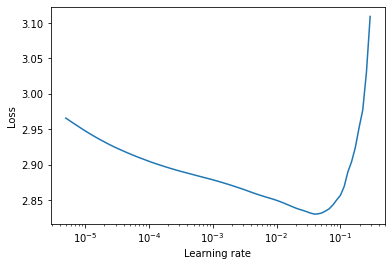

In [0]:


#model = modeldef.S11Model().to(device)
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
#modeltrt.lrfinder(model, device, train_loader, optimizer)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader=train_dl, val_loader=test_dl, start_lr=0.000001, end_lr=0.5,num_iter=98)
lr_finder.plot()
lr_finder.reset()

In [0]:



import torch.optim as optim
#model =  modeldef.net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.008, momentum=0.9)
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    modeltrt.train(model, device, train_loader, optimizer, epoch)
    modeltrt.test(model, device, test_loader)


EPOCH: 0


NameError: ignored

In [0]:
import torch, torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.models as models
import matplotlib.pyplot as plt
import time, os, copy, numpy as np
#from livelossplot import PlotLosses
import sys

def train_model(model, dataloaders, dataset_sizes, criterion, optimizer, scheduler, num_epochs=25):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    since = time.time()
    #liveloss = PlotLosses()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for i,(inputs, labels) in enumerate(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                print("\rIteration: {}/{}, Loss: {}.".format(i+1, len(dataloaders[phase]), loss.item() * inputs.size(0)), end="")

#                 print( (i+1)*100. / len(dataloaders[phase]), "% Complete" )
                sys.stdout.flush()
                
                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            if phase == 'train':
                avg_loss = epoch_loss
                t_acc = epoch_acc
            else:
                val_loss = epoch_loss
                val_acc = epoch_acc
            
#             print('{} Loss: {:.4f} Acc: {:.4f}'.format(
#                 phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
        
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model
